# The Spark Foundation
# Data Science and Bussiness Analytics
# Task 1- Explortory Data Analysis on Retail
# Author- Khushi Sharma
# problem statement- As a business manager, find out the weak areas where the store can work to earn more profit

In [27]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [29]:

df = pd.read_csv('C:\\Users\\ADMINI\\Desktop\\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [31]:
df.shape

(9994, 13)

In [32]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [33]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [34]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [35]:
df.City.unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [36]:
df.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [37]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [38]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [39]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [40]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

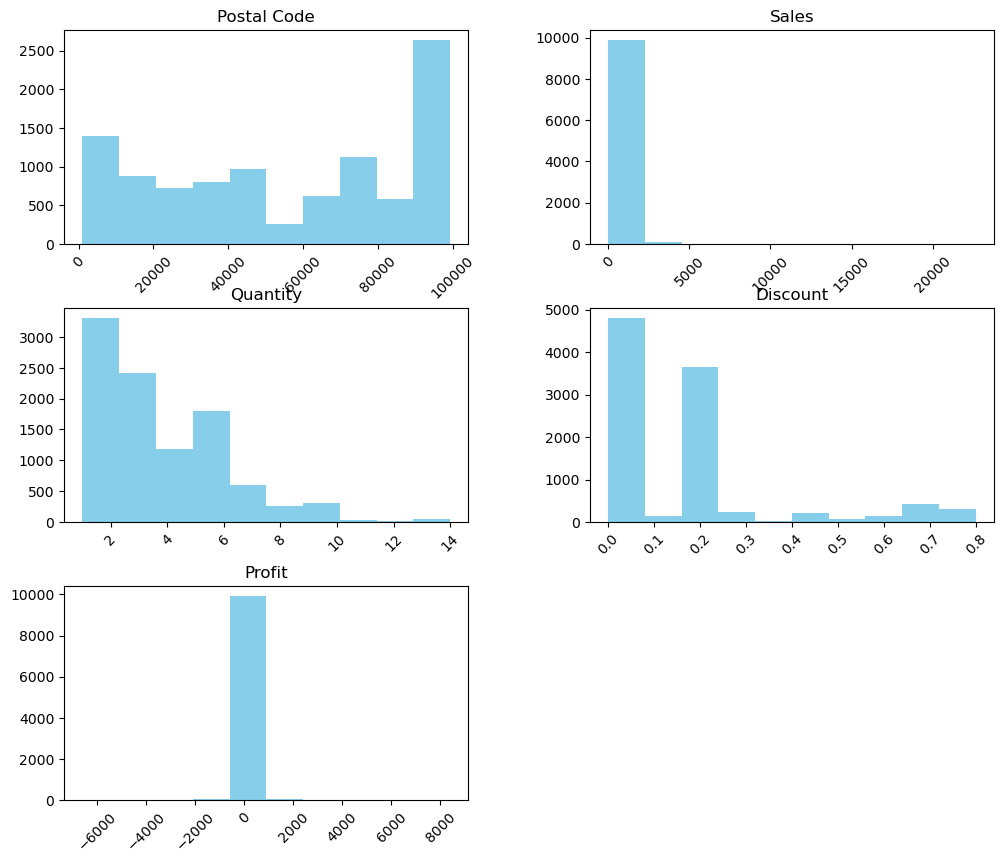

In [41]:
df.hist(figsize=(12, 10), color='skyblue', grid=False, xrot=45)
plt.show()

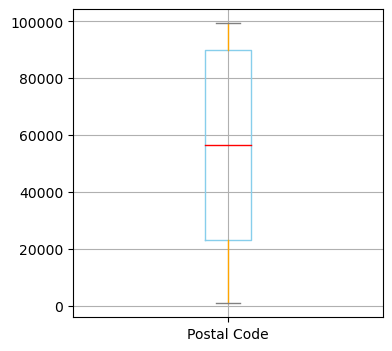

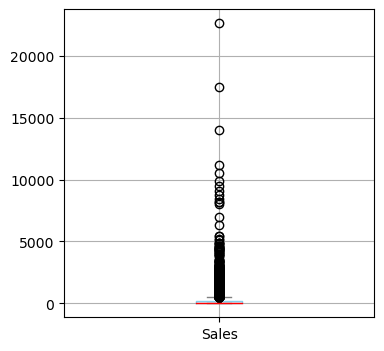

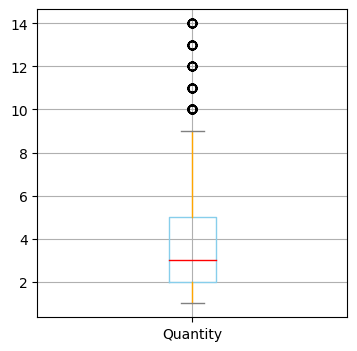

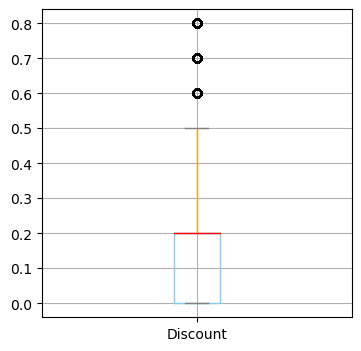

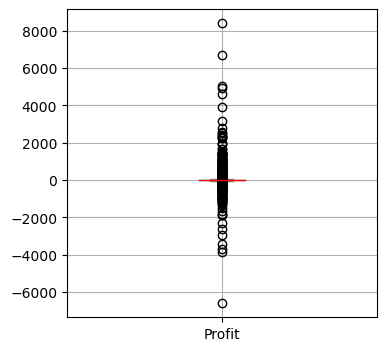

In [42]:
for column in df.select_dtypes(exclude='object'):
    plt.figure(figsize=(4, 4))  # Set the figure size
    df.boxplot(column, color=dict(boxes='skyblue', whiskers='orange', medians='red', caps='gray'))
    plt.show()

In [43]:
import plotly.graph_objects as go

colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow']

fig = go.Figure(data=go.Pie(labels=df['Region'], values=df['Sales'], title='Sales by Region'))

fig.update_traces(marker=dict(colors=colors))

fig.show()


In [44]:
profit_in_each_category=df.groupby(['Category'])['Profit'].sum()
profit_in_each_category

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

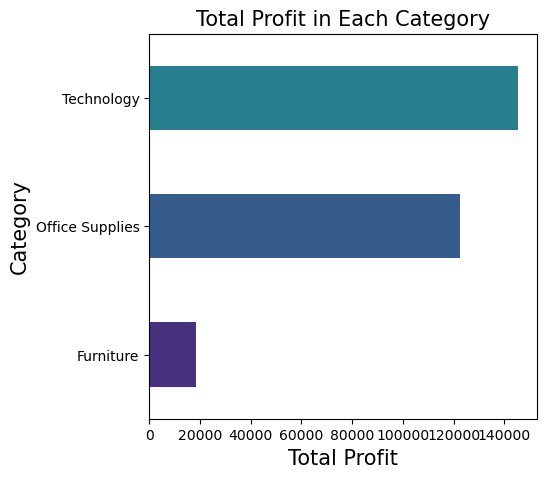

In [45]:
profit_in_each_category = df.groupby(['Category'])['Profit'].sum().plot(kind='barh', figsize=(5, 5), color=sns.color_palette("viridis"))
plt.xlabel('Total Profit', fontsize=15)
plt.ylabel('Category', fontsize=15)
plt.title('Total Profit in Each Category', fontsize=15)
plt.show()


<Axes: xlabel='Sales', ylabel='Sub-Category'>

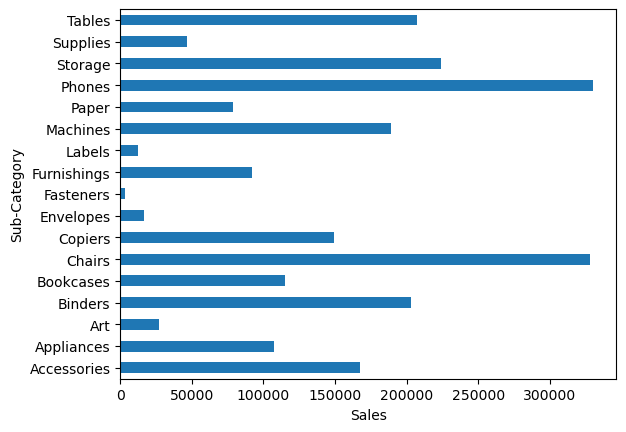

In [46]:
sales_sub_category=df.groupby(['Sub-Category'])['Sales'].sum().plot(kind='barh')
sales_sub_category.set_xlabel('Sales')
sales_sub_category

In [47]:
px.pie(df,values='Sales',names='Sub-Category',title='Sales by Sub-Category')

In [48]:
px.pie(df,values='Quantity',names='Sub-Category',title='Quantity in each sub-category')

<Axes: ylabel='City'>

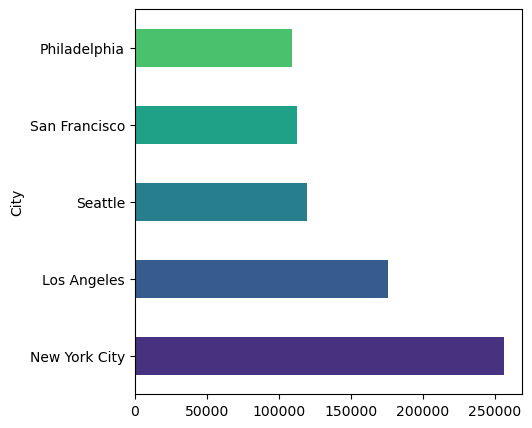

In [49]:
City_sales=df.groupby(['City'])['Sales'].sum()
City_sales.nlargest(5).plot(kind='barh',figsize=(5,5),color=sns.color_palette('viridis'))

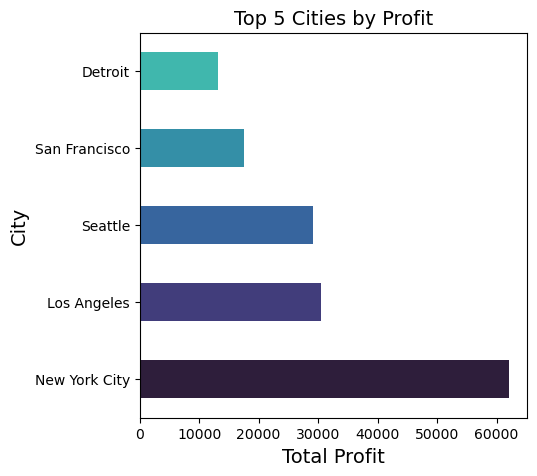

In [50]:
import matplotlib.pyplot as plt

City_sales = df.groupby(['City'])['Profit'].sum()
top_cities = City_sales.nlargest(5)

plt.figure(figsize=(5, 5)) 
top_cities.plot(kind='barh', color=sns.color_palette('mako'))
plt.xlabel('Total Profit', fontsize=14) 
plt.ylabel('City', fontsize=14)
plt.title('Top 5 Cities by Profit', fontsize=14)
plt.show()


In [51]:
fig=go.Figure(go.Pie(values=df['Sales'],labels=df['State'],title='Sales by States'))
fig.update_layout(
    autosize=False,
    width=600,
    height=600
)
fig.show()


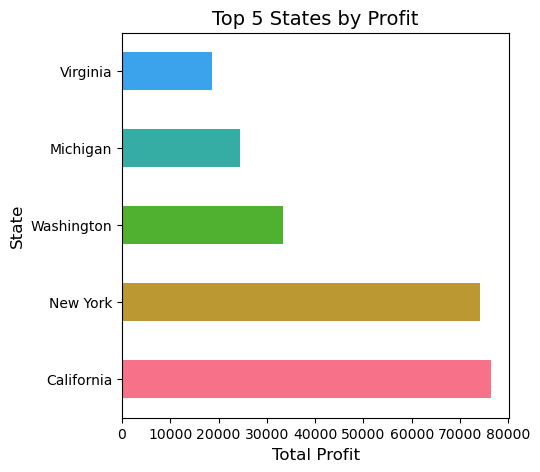

In [52]:
import matplotlib.pyplot as plt

State_profit = df.groupby(['State'])['Profit'].sum()
top_states = State_profit.nlargest(5)

plt.figure(figsize=(5, 5))  
top_states.plot(kind='barh', color=sns.color_palette('husl'))
plt.xlabel('Total Profit', fontsize=12)  
plt.ylabel('State', fontsize=12)  
plt.title('Top 5 States by Profit', fontsize=14)  
plt.show()


<Axes: ylabel='City'>

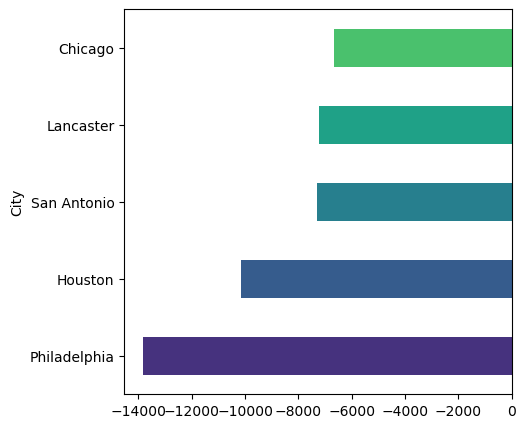

In [53]:
City_sales=df.groupby(['City'])['Profit'].sum()
City_sales.nsmallest(5).plot(kind='barh',figsize=(5,5),color=sns.color_palette('viridis'))

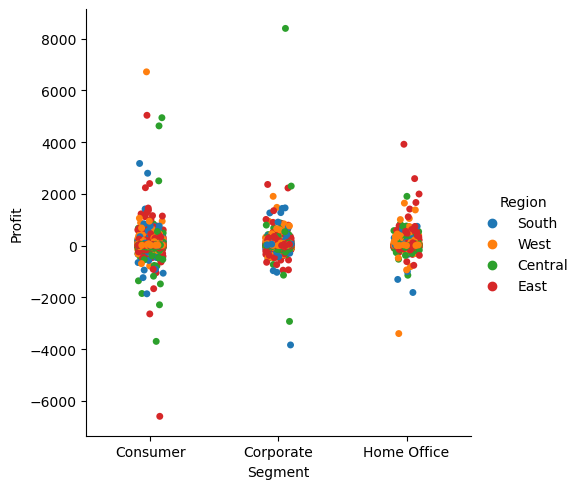

In [54]:
sns.catplot(data=df,x='Segment',y='Profit',hue='Region')

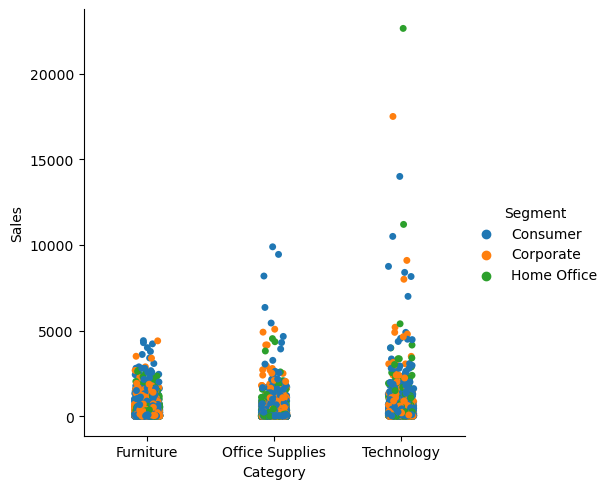

In [55]:
sns.catplot(data=df,x='Category',y='Sales',hue='Segment')

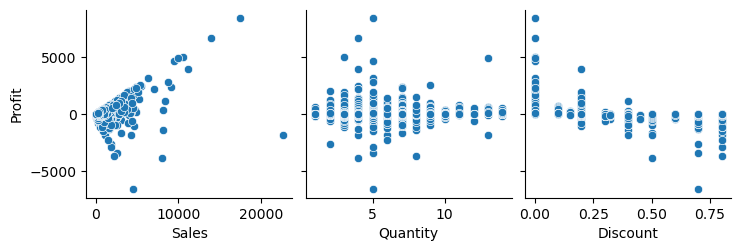

In [56]:
sns.pairplot(df,x_vars=['Sales','Quantity','Discount'],y_vars=['Profit'])

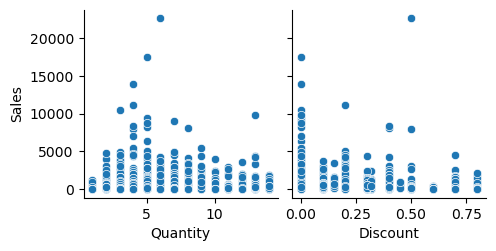

In [57]:
sns.pairplot(df,x_vars=['Quantity','Discount'],y_vars=['Sales'])

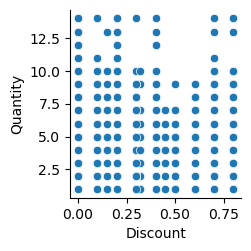

In [58]:
sns.pairplot(df,x_vars=['Discount'],y_vars=['Quantity'])

In [59]:
data=df.corr()
data

C:\Users\ADMINI\AppData\Local\Temp\ipykernel_13772\1154115066.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<Axes: >

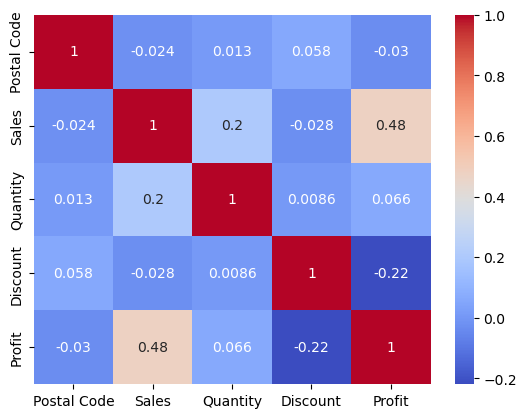

In [60]:
sns.heatmap(data, annot=True, cmap='coolwarm')